<a href="https://colab.research.google.com/github/canneltigrou/canneltigrou.github.io/blob/master/JupyterNotebooks/smileyFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I want to capture the image from the camera, and transform the face into a big smiley depending of the posture of the face.  
I plan to use DLib with the face_landmark_detection

## Adding of the camera
I used directly the code snippets "Camera Capture"  
You can try if it works capturing one image from your camera.

In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


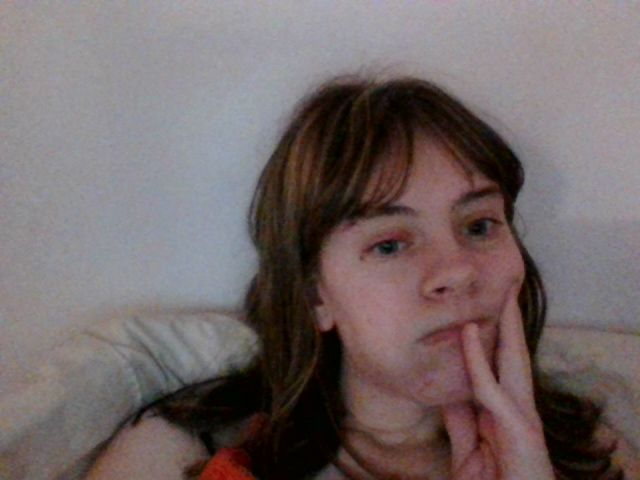

In [4]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Detect the face
using HOG from DLib  
we can find an example code [here](http://dlib.net/face_detector.py.html)

In [5]:
import dlib


In [6]:
detector = dlib.get_frontal_face_detector()

In [9]:
#win = dlib.image_window()

In [7]:
f = filename
print("Processing file: {}".format(f))
img = dlib.load_rgb_image(f)
# The 1 in the second argument indicates that we should upsample the image
# 1 time.  This will make everything bigger and allow us to detect more
# faces.
dets = detector(img, 1)

Processing file: photo.jpg


In [10]:
for i, d in enumerate(dets):
  print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(i, d.left(), d.top(), d.right(), d.bottom()))

Detection 0: Left: 315 Top: 167 Right: 538 Bottom: 390


Display the result

In [15]:
from PIL import Image


uint8
(480, 640, 3)


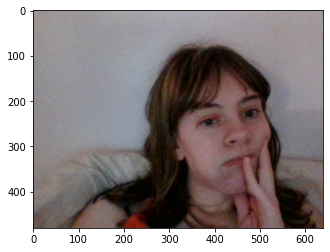

In [17]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread(filename)
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

To display only the detected face

In [11]:
%matplotlib inline

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


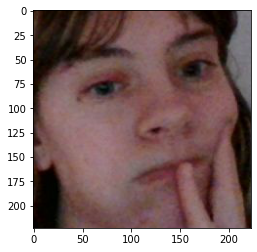

In [21]:
d = dets[0]
face_image = image[d.top():d.bottom(), d.left():d.right()]
plt.imshow(face_image)
plt.show()

## Use of the landmarks

1. Download the pretrained shape predictor

In [23]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2021-03-24 04:50:53--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_  47%[========>           ]  29.02M   407KB/s    in 53s     

2021-03-24 04:51:46 (565 KB/s) - Connection closed at byte 30430856. Retrying.

--2021-03-24 04:51:47--  (try: 2)  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 64040097 (61M), 33609241 (32M) remaining
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[+++++++++==========>]  61.07M  8.47MB/s    in 6.3s    

2021-03-24 04:51:53 (5.08 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/640400

unzip the file

In [25]:
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2

bunzip2: Can't open input file shape_predictor_68_face_landmarks.dat.bz2: No such file or directory.
bunzip2: Can't open input file data/: No such file or directory.


2. Let's use it

In [29]:
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


In [30]:
shape = predictor(image, d)

In [43]:
shape.num_parts

68

In [52]:
point = shape.part(67)

In [55]:
point_x = point.x

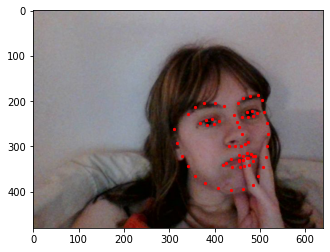

In [59]:
# Draw the face landmarks on the screen.
plt.imshow(image)

for i in range(68):
  point = (shape.part(i).x, shape.part(i).y)
  plt.scatter(point[0], point[1], s=5, c='red', marker='o')
plt.show()
